In [74]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [75]:
# getting the data
path="https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data"
df = pd.read_csv(path,header=None)

In [76]:
# giving headings to the columns
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

In [77]:
df.columns = headers

In [78]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [79]:
df.to_csv('cars.csv', index=False)

In [80]:
df.loc[df['price'] == '?', 'price']

9      ?
44     ?
45     ?
129    ?
Name: price, dtype: object

In [81]:
# Removing rows of price which has '?' as its value
df.drop(df.loc[df['price'] == '?'].index, inplace=True)

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 26 columns):
symboling            201 non-null int64
normalized-losses    201 non-null object
make                 201 non-null object
fuel-type            201 non-null object
aspiration           201 non-null object
num-of-doors         201 non-null object
body-style           201 non-null object
drive-wheels         201 non-null object
engine-location      201 non-null object
wheel-base           201 non-null float64
length               201 non-null float64
width                201 non-null float64
height               201 non-null float64
curb-weight          201 non-null int64
engine-type          201 non-null object
num-of-cylinders     201 non-null object
engine-size          201 non-null int64
fuel-system          201 non-null object
bore                 201 non-null object
stroke               201 non-null object
compression-ratio    201 non-null float64
horsepower           201 non-nul

In [83]:
# take only the required fields
features = ['make','fuel-type','num-of-doors','body-style','drive-wheels','engine-size','horsepower','city-mpg','highway-mpg','price']
cars = df.loc[: , features]

In [84]:
cars.shape

(201, 10)

In [85]:
cars['price'] = cars['price'].astype('float')

In [86]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 10 columns):
make            201 non-null object
fuel-type       201 non-null object
num-of-doors    201 non-null object
body-style      201 non-null object
drive-wheels    201 non-null object
engine-size     201 non-null int64
horsepower      201 non-null object
city-mpg        201 non-null int64
highway-mpg     201 non-null int64
price           201 non-null float64
dtypes: float64(1), int64(3), object(6)
memory usage: 17.3+ KB


## Analysis

In [87]:
g = cars.groupby('make', as_index=False)['price'].mean()

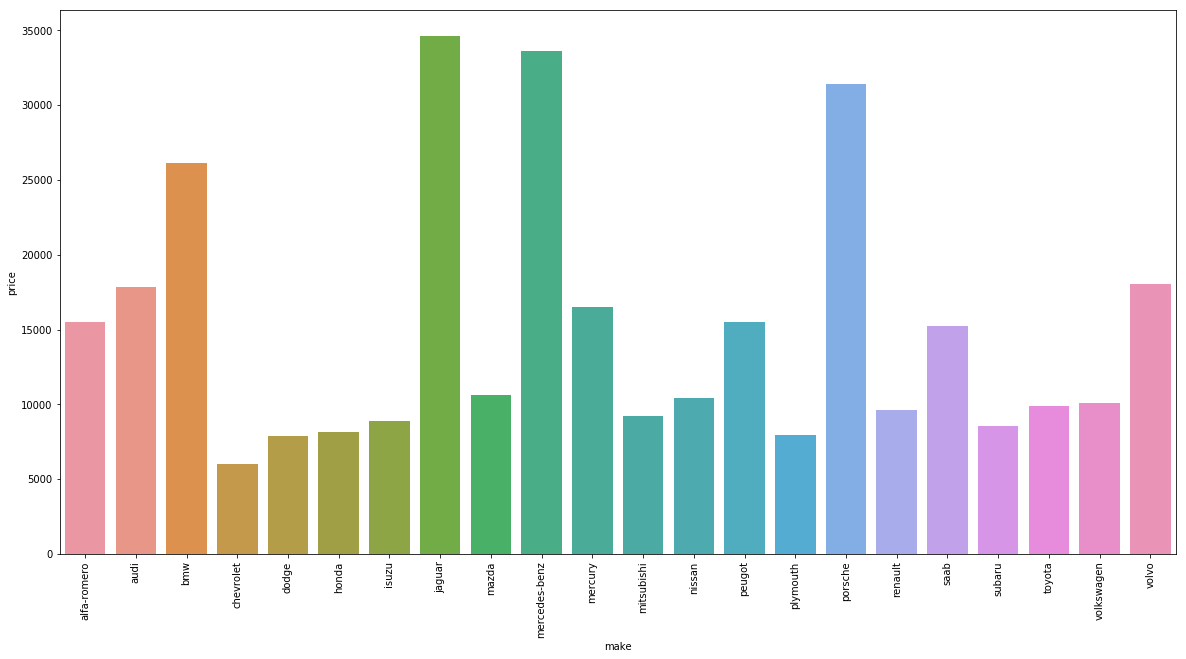

In [88]:
# checking the average price for every make
plt.gcf().set_size_inches(20,10)
plt.xticks(rotation='vertical')
sns.barplot(x='make', y='price', data=g)

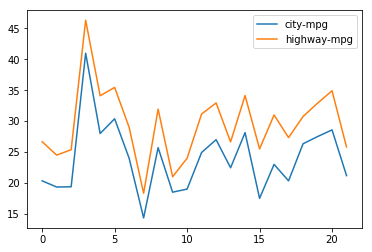

In [89]:
# compating city and highway mileage
g = cars.groupby('make', as_index=False)['city-mpg', 'highway-mpg'].mean()
g.plot()

C:\Users\Peeyush\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


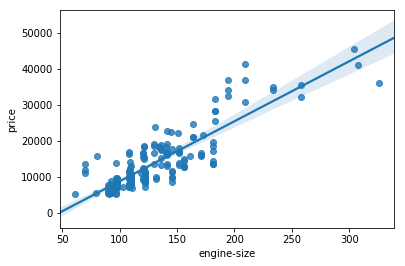

In [90]:
# comparing engine size with price
sns.regplot(x='engine-size', y='price', data=cars)

## Data Cleaning

In [91]:
# check if there are any '?' in any field
cars['horsepower'].value_counts()

68     19
69     10
70      9
116     9
110     8
95      7
101     6
114     6
62      6
88      6
97      5
84      5
76      5
160     5
145     5
102     5
82      5
123     4
92      4
111     4
86      4
90      3
85      3
182     3
152     3
73      3
121     3
207     3
162     2
52      2
161     2
94      2
56      2
155     2
100     2
?       2
176     2
156     2
184     2
112     2
120     1
175     1
140     1
60      1
55      1
78      1
200     1
64      1
135     1
48      1
72      1
142     1
262     1
106     1
58      1
115     1
134     1
143     1
154     1
Name: horsepower, dtype: int64

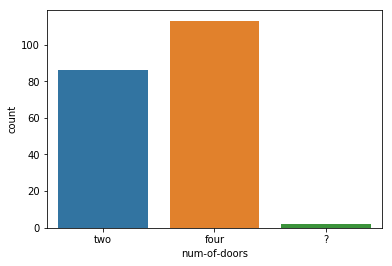

In [92]:
sns.countplot(cars['num-of-doors'])

In [93]:
# replace '?' with the mode in num-of-doors
cars.loc[cars['num-of-doors'] == '?', 'num-of-doors'] = cars['num-of-doors'].mode()[0]

In [94]:
cars['num-of-doors'].value_counts()

four    115
two      86
Name: num-of-doors, dtype: int64

In [95]:
# replace '?' with median in horsepower
hp_median = cars.loc[cars['horsepower'] != '?', 'horsepower'].median()
hp_median
cars.loc[ cars['horsepower'] == '?', 'horsepower'] = hp_median

In [96]:
cars.loc[cars['horsepower'] == '?', 'horsepower'].count()

0

In [97]:
cars['horsepower'] = cars['horsepower'].astype('float')

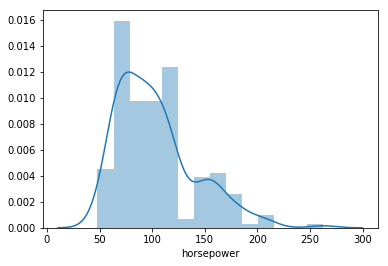

In [98]:
sns.distplot(cars['horsepower'])

## Data Transformation

In [99]:
cars = pd.get_dummies(cars)

In [100]:
cars.columns

Index(['engine-size', 'horsepower', 'city-mpg', 'highway-mpg', 'price',
       'make_alfa-romero', 'make_audi', 'make_bmw', 'make_chevrolet',
       'make_dodge', 'make_honda', 'make_isuzu', 'make_jaguar', 'make_mazda',
       'make_mercedes-benz', 'make_mercury', 'make_mitsubishi', 'make_nissan',
       'make_peugot', 'make_plymouth', 'make_porsche', 'make_renault',
       'make_saab', 'make_subaru', 'make_toyota', 'make_volkswagen',
       'make_volvo', 'fuel-type_diesel', 'fuel-type_gas', 'num-of-doors_four',
       'num-of-doors_two', 'body-style_convertible', 'body-style_hardtop',
       'body-style_hatchback', 'body-style_sedan', 'body-style_wagon',
       'drive-wheels_4wd', 'drive-wheels_fwd', 'drive-wheels_rwd'],
      dtype='object')

In [101]:
cars.shape

(201, 39)

In [102]:
## creating X and y
y = cars['price']
X = cars 
X.drop(columns=['price'], inplace=True)

In [103]:
X.head()

,engine-size,horsepower,city-mpg,highway-mpg,make_alfa-romero,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,...,num-of-doors_four,num-of-doors_two,body-style_convertible,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon,drive-wheels_4wd,drive-wheels_fwd,drive-wheels_rwd
0,130,111.0,21,27,1,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,1
1,130,111.0,21,27,1,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,1
2,152,154.0,19,26,1,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1
3,109,102.0,24,30,0,1,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
4,136,115.0,18,22,0,1,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0


In [104]:
X.shape, y.shape

((201, 38), (201,))

## Building Model using Linear Regression

In [106]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [109]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [110]:
y_pred = model.predict(X_test)

In [112]:
model.score(X_test, y_test)

0.9140680034132762

In [114]:
# calculating error
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

mse = mean_squared_error(y_test,y_pred)
print(f"Mean Squared Error : {mse:0.2f}")

r2score = r2_score(y_test,y_pred)
print(f"R2 Score: {r2score:0.2f}")

mae = mean_absolute_error(y_test,y_pred)
print(f"Mean Absolute Error : {mae:0.2f}")

Mean Squared Error : 6511092.46
R2 Score: 0.91
Mean Absolute Error : 1778.72


## Random Forest Regressor

In [115]:
from sklearn.ensemble import RandomForestRegressor

In [121]:
model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
r2score = r2_score(y_test,y_pred)
print(f"R2 Score: {r2score:0.2f}")

R2 Score: 0.94


C:\Users\Peeyush\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
